# การบันทึกโมเดล (Model) ในรูปแบบ h5 (HDF5)

## โหลด Library ของ Keras

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Dropout, Input

Using TensorFlow backend.


## กำหนดค่าพารามิเตอร์
*  **batch_size** หมายถึง การส่งชุดข้อมูลเข้าไปประมวลผล **batch_size = 128** หมายถึงส่งเข้าไปครั้งละ 128 ชุด
*  **num_classes** หมายถึงจำนวนของกลุ่มข้อมูล **num_classes * 10** หมายถึงมีจำนวน 10 กลุ่ม (ในตัวอย่างใช้ชุดข้อมูล MNIST ซึ่งเป็นตัวเลข 0-9 จึงมี 10 กลุ่ม)
*  **epochs** หมายถึง จำนวนรอบที่ใช้ในการเรียนรู้ (Training) **epochs = 100** หมายถึง กำหนดให้เรียนรู้จำนวน 100 รอบ

In [0]:
batch_size = 128
num_classes = 10
epochs = 100

## โหลดข้อมูล MNIST

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


## ปรับเปลี่ยนรูปแบบของข้อมูล (Transform)

In [0]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## กำหนดรูปแบบของผลลัพธ์ (Output)

จากคำสั่ง **keras.utils.to_categorical()** หมายถึงการปรับรูปแบบของผลลัพธ์ ให้มีผลลัพธ์ดังต่อไปนี้

```
Label            Output  
8                [0 0 0 0 0 0 0 0 1 0]  
0                [1 0 0 0 0 0 0 0 0 0]  
2                [0 0 1 0 0 0 0 0 0 0]
```

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## สร้างโมเดลเพื่อใช้งาน

จากตัวอย่างได้สร้างโมเดลของ Multi Layer Perceptron (MLP) โดยมีโครงสร้างดังนี้  
```
Input layer = 784 โหนด

Hidden layer = 2 เลเยอร์
      h1 = 512 โหนด 
      h2 = 512 โหนด 
      โดยทั้ง h1 และ h2 ใช้ activation function แบบ ReLU (Rectified Linear Unit) และกำหนดให้มี dropout = 0.2 (regularization technique for reducing overfitting in neural networks by preventing complex co-adaptations on training data)
      
Output layer = 10 โหนด (num_classes = 10) 
     โดยใช้ activation แบบ softmax ซึ่งเป็นการเปลี่ยน output ที่ได้ให้อยู่ในรูปแบบของความน่าจะเป็น (Probabilities) โดยผลรวม (Sum) ของ output จะมีค่าเป็น 1
```

In [0]:
inp = Input((784,))
x = Dense(512, activation='relu')(inp)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
out = Dense(num_classes, activation='softmax')(x)

model = Model(inp, out)

## ตรวจโครงสร้างของโมเดล

In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


## แสดงโมเดลในรูปแบบของรูปภาพ

In [12]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
keras.utils.plot_model(model, '/content/drive/My Drive/Colab Notebooks/deep-learning/multi_input_and_output_model.png', show_shapes=True)

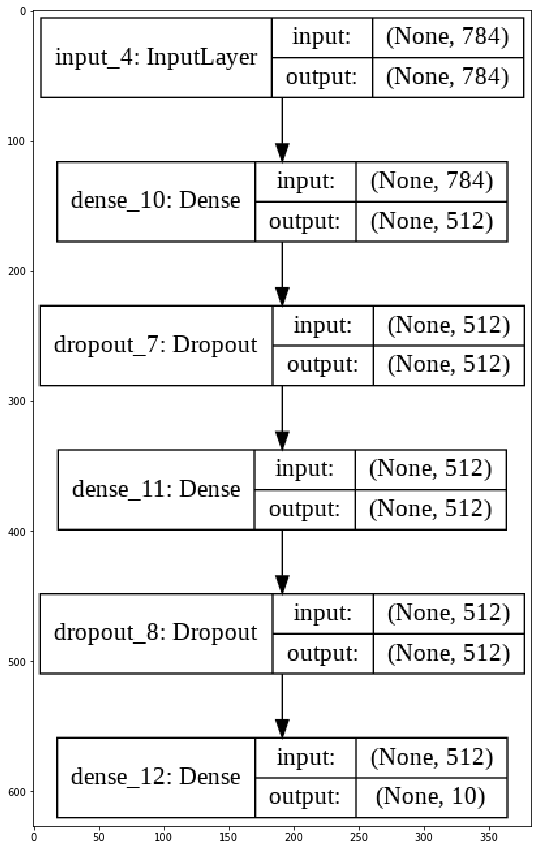

In [73]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

img = mpimg.imread('/content/drive/My Drive/Colab Notebooks/deep-learning/multi_input_and_output_model.png')
plt.imshow(img)
plt.show()                   

## กำหนด Loss Function, Optimizer (Learning function) และ Metrics  ที่ใช้ในการเรียนรู้


* **sgd** = Stochastic gradient descent
อ่านเพิ่มเติม http://ruder.io/optimizing-gradient-descent/
* **loss='categorical_crossentropy'** ใช้ในกรณีที่เป็น Multiclass problem (หมายถึงคำตอบ (output) มี Class มากกว่า 2 Class) หาก output มีจำนวน 2 class เรียกว่า binary problem ให้กำหนดเป็น *binary_crossentropy*
(ตัวอย่างของคำตอบที่ได้จากการใช้ categorical_crossentropy: https://jovianlin.io/cat-crossentropy-vs-sparse-cat-crossentropy/)
* metrics = ['accuracy'] เป็นฟังก์ชันที่ใช้สำหรับวัดประสิทธิภาพ (Performance) ของโมเดล
(อ่านเพิ่มเติม: https://keras.io/metrics/)



In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd', metrics=['accuracy'])

## เรียนรู้ (Training) ข้อมูล MNIST จากโมเดล MLP ที่สร้างขึ้น ด้วยคำสั่ง fit

In [51]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.2412 - acc: 0.9312 - val_loss: 0.1974 - val_acc: 0.9418
Epoch 2/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.2329 - acc: 0.9328 - val_loss: 0.1898 - val_acc: 0.9452
Epoch 3/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.2227 - acc: 0.9360 - val_loss: 0.1823 - val_acc: 0.9479
Epoch 4/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.2133 - acc: 0.9383 - val_loss: 0.1754 - val_acc: 0.9487
Epoch 5/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.2051 - acc: 0.9408 - val_loss: 0.1699 - val_acc: 0.9504
Epoch 6/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.1996 - acc: 0.9421 - val_loss: 0.1634 - val_acc: 0.9535
Epoch 7/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.1926 - acc: 0.9442 - val_loss: 0.1585 - 

## บันทึกโมเดล (Model) ในรูปแบบของ h5 (HDF5)

In [0]:
model.save("/content/drive/My Drive/Colab Notebooks/deep-learning/model.h5")

อ่านเพิ่มเติม: https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

# ตรวจสอบความถูกต้องของโมเดลที่ได้จากการเรียนรู้

จากตัวอย่างโปรแกรม ได้เก็บผลของการเรียนรู้ไว้ในตัวแปรชื่อ **history**  

```
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
```                    
                    

## แสดงข้อมูลการเรียนรู้ของโมเดลด้วยกราฟ

In [52]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [53]:
print('history dict:', history.history)

history dict: {'val_loss': [0.19735034425258635, 0.18983201158046722, 0.1822944172024727, 0.17544022617340088, 0.16985957601666452, 0.16344990571141244, 0.15854541912674905, 0.15365464341640472, 0.14902542625069617, 0.14437987454533577, 0.1407592796266079, 0.1376043410897255, 0.13373939583301545, 0.1304707374572754, 0.12720360865294933, 0.12442818039059639, 0.12117353544533253, 0.11908785718381405, 0.11639974756240845, 0.11437083796262741, 0.11182932600080966, 0.11045192975997925, 0.10803091125190258, 0.10693873628675937, 0.10429615256339311, 0.10290701845139265, 0.1014837173447013, 0.09977984395772219, 0.09871830847263337, 0.09711981489062309, 0.09509047399014235, 0.09410012243241071, 0.09318696249201894, 0.09126006976217031, 0.09068664947599173, 0.08949950521513819, 0.08862993307188154, 0.08815031028911471, 0.0867207083158195, 0.08587297188192607, 0.08474028744399548, 0.08367146722301841, 0.08273278148770333, 0.08181232685670256, 0.08122153893411159, 0.08081959369219839, 0.0797016956

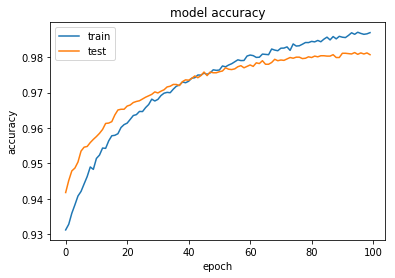

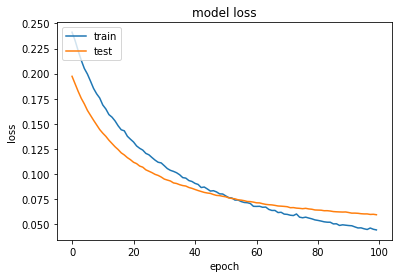

In [54]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

อ่านรายละเอียดเพิ่มเติม: 
*  https://www.kaggle.com/danbrice/keras-plot-history-full-report-and-grid-search
*  https://www.tensorflow.org/alpha/guide/keras/training_and_evaluation

## พยากรณ์ (Predict) ข้อมูลชุดทดสอบ (Test data) 

### ใช้คำสั่ง predict

In [0]:
y_pred = model.predict(x_test)

In [78]:
print(y_pred.shape)

print('y_pred', y_pred[0])
print('y_test', y_test[0])

(10000, 10)
y_pred [2.8305499e-07 4.7998714e-07 6.9041039e-06 2.3277753e-04 3.8535726e-09
 1.1705325e-06 9.0329320e-11 9.9974507e-01 3.2681123e-07 1.2924816e-05]
y_test [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [59]:
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print('\n# Generate predictions for 3 samples')
predictions = model.predict(x_test[:3])
print('predictions shape:', predictions.shape)


# Generate predictions for 3 samples
predictions shape: (3, 10)


In [60]:
predictions[0]

array([2.8305499e-07, 4.7998714e-07, 6.9041039e-06, 2.3277753e-04,
       3.8535726e-09, 1.1705325e-06, 9.0329320e-11, 9.9974507e-01,
       3.2681123e-07, 1.2924816e-05], dtype=float32)

### ใช้คำสั่ง evaluate

In [58]:
# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on test data')
results = model.evaluate(x_test, y_test, batch_size=batch_size)
print('test loss, test acc:', results)



# Evaluate on test data
10000/10000 [==============================] - 0s 16us/step
test loss, test acc: [0.059595905978232624, 0.9807]


อ่านเพิ่มเติม:  
* https://machinelearningmastery.com/evaluate-performance-deep-learning-models-keras/
* https://www.tensorflow.org/alpha/guide/keras/training_and_evaluation

### Accuracy result

In [75]:
print("%s: %.2f%%" % (model.metrics_names[1], results[1]*100))

acc: 98.07%


## Confusion Matrix

In [0]:
(xx_train, yy_train), (xx_test, yy_test) = mnist.load_data()

ตัวอย่าง Label ข้อมูลชุดเรียนรู้ (Test Data)

In [116]:
print(yy_test)

[7 2 1 ... 4 5 6]


ตัวอย่าง ผลลัพธ์ที่ได้จากการพยากรณ์

In [117]:
print(y_pred)

[[2.8305499e-07 4.7998714e-07 6.9041039e-06 ... 9.9974507e-01
  3.2681123e-07 1.2924816e-05]
 [2.1878357e-06 1.5107222e-04 9.9966800e-01 ... 3.1947034e-09
  1.2151856e-05 5.9145314e-11]
 [1.6837515e-06 9.9890566e-01 1.6402629e-04 ... 5.3358654e-04
  2.0243537e-04 1.7475635e-06]
 ...
 [1.0256141e-10 5.3352625e-09 2.4906754e-10 ... 1.0818295e-06
  1.0676994e-06 9.7464899e-06]
 [1.3382720e-07 1.2067730e-08 1.0490702e-09 ... 5.5035221e-09
  9.8337216e-05 1.7661382e-09]
 [1.9383447e-07 1.1936387e-09 5.8192335e-08 ... 1.2628912e-11
  1.6190147e-09 1.2623385e-09]]


### หา Index ของค่าสูงสุดในแต่ละแถว

In [136]:
yy_pred = y_pred.argmax(axis=1)

print(yy_pred)

[7 2 1 ... 4 5 6]


### สร้าง confusion matrix

ใช้ Library ของ scikit learn ในการสร้าง confusion matrix

In [0]:
from sklearn.metrics import confusion_matrix

con_matrix = confusion_matrix(yy_test, yy_pred)

ใช้ Library ของ seaborn ในการสร้างกราฟิก

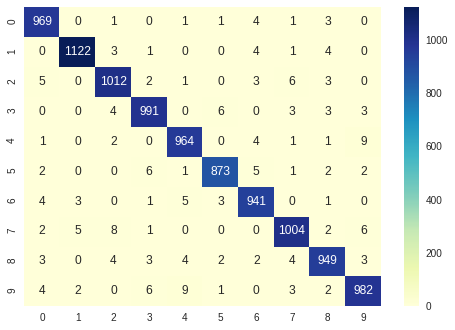

In [148]:
import seaborn as sns; sns.set()

ax = sns.heatmap(con_matrix, annot=True, fmt='d', cmap="YlGnBu")

อ่าน seaborn เพิ่มเติม:
https://seaborn.pydata.org/generated/seaborn.heatmap.html

# การโหลดโมเดลมาใช้งาน

รายละเอียดเพิ่มเติม:
https://machinelearningmastery.com/save-load-keras-deep-learning-models/

**วิธีที่ 1**

สร้างฟังก์ชัน **create_model()**  เพื่อให้เรียกใช้โมเดลได้ง่ายขึ้น โดยโครงสร้างโมเดลต้องเหมือนกันกับโมเดลที่บันทึกไว้ก่อนหน้า

In [0]:
def create_model():
  inp = Input((784,))
  x = Dense(512, activation='relu')(inp)
  x = Dropout(0.2)(x)
  x = Dense(512, activation='relu')(x)
  x = Dropout(0.2)(x)
  out = Dense(num_classes, activation='softmax')(x)
  
  model = Model(inp, out)
  
  return model

โหลดโมเดลมาใช้งาน

In [0]:
model = create_model()

weights_path = '/content/drive/My Drive/Colab Notebooks/deep-learning/model.h5'
model.load_weights(weights_path)

**วิธีที่ 2**

In [0]:
from keras.models import load_model

model_tmp = load_model(weights_path)

## ทดสอบโมเดล

In [155]:
print('\n# Generate predictions for 3 samples')
predictions = model_tmp.predict(x_test[:3])
print('predictions shape:', predictions.shape)


# Generate predictions for 3 samples
predictions shape: (3, 10)


In [156]:
print(predictions)

[[2.5281092e-06 1.5376789e-07 1.2454280e-04 1.8592588e-04 9.6292538e-09
  4.6635273e-07 6.5786085e-11 9.9966991e-01 1.5555220e-06 1.4887487e-05]
 [6.6592070e-06 2.4626078e-04 9.9954021e-01 1.3055932e-04 1.4719836e-09
  4.3441269e-06 5.3162232e-05 4.3958308e-09 1.8650506e-05 1.5412042e-10]
 [3.4355269e-06 9.9789989e-01 2.7219692e-04 1.3281609e-05 3.6100642e-04
  3.4251811e-05 2.1597536e-04 1.0300244e-03 1.6116863e-04 8.6955852e-06]]


# Checkpoint Neural Network Model
ตรวจสอบและบันทึกเฉพาะโมเดลที่ดีที่สุด

In [0]:
from keras.callbacks import ModelCheckpoint

model = create_model()
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


# checkpoint
filepath='/content/drive/My Drive/Colab Notebooks/deep-learning/model/weights-improvement-{epoch:02d}-{val_acc:.4f}.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [160]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    callbacks=callbacks_list,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 48us/step - loss: 1.1954 - acc: 0.6966 - val_loss: 0.5330 - val_acc: 0.8734

Epoch 00001: val_acc improved from -inf to 0.87340, saving model to /content/drive/My Drive/Colab Notebooks/deep-learning/model/weights-improvement-01-0.8734.hdf5
Epoch 2/100
60000/60000 [==============================] - 2s 41us/step - loss: 0.5271 - acc: 0.8524 - val_loss: 0.3734 - val_acc: 0.8988

Epoch 00002: val_acc improved from 0.87340 to 0.89880, saving model to /content/drive/My Drive/Colab Notebooks/deep-learning/model/weights-improvement-02-0.8988.hdf5
Epoch 3/100
60000/60000 [==============================] - 2s 41us/step - loss: 0.4228 - acc: 0.8791 - val_loss: 0.3209 - val_acc: 0.9098

Epoch 00003: val_acc improved from 0.89880 to 0.90980, saving model to /content/drive/My Drive/Colab Notebooks/deep-learning/model/weights-improvement-03-0.9098.hdf5
Epoch 4/100
60000/60000 [=============

## โหลดโมเดลที่ดีที่สุดมาเพื่อพยากรณ์

In [0]:
model = create_model()

weights_path = '/content/drive/My Drive/Colab Notebooks/deep-learning/model/weights-improvement-94-0.9803.hdf5'
#model.load_weights(weights_path)
best_model = load_model(weights_path)

ทดสอบ

In [162]:
print('\n# Generate predictions for 3 samples')
predictions = model_tmp.predict(x_test[:3])
print('predictions shape:', predictions.shape)


# Generate predictions for 3 samples
predictions shape: (3, 10)


In [163]:
print(predictions)

[[2.5281092e-06 1.5376789e-07 1.2454280e-04 1.8592588e-04 9.6292538e-09
  4.6635273e-07 6.5786085e-11 9.9966991e-01 1.5555220e-06 1.4887487e-05]
 [6.6592070e-06 2.4626078e-04 9.9954021e-01 1.3055932e-04 1.4719836e-09
  4.3441269e-06 5.3162232e-05 4.3958308e-09 1.8650506e-05 1.5412042e-10]
 [3.4355269e-06 9.9789989e-01 2.7219692e-04 1.3281609e-05 3.6100642e-04
  3.4251811e-05 2.1597536e-04 1.0300244e-03 1.6116863e-04 8.6955852e-06]]
